In [1]:
import numpy as np
import glafic
import pylab as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [2]:
p = [0.3, 0.7, -1.0, 0.7, 'out', -5, -5, 5, 5, 0.1, 0.1, 5]
#[omega, lambda, weos, hubble, prefix, xmin[arcsec], ymin[arcsec], xmax[arcsec], ymax[arcsec], pix_ext[arcsec], pix_poi[arcsec], maxlev]
glafic.init(*p)

######## parameter definition
omega    =  3.000000e-01
lambda   =  7.000000e-01
weos     =  -1.000000e+00
hubble   =  7.000000e-01
prefix   =  out
xmin     =  -5.000000e+00
ymin     =  -5.000000e+00
xmax     =  5.000000e+00
ymax     =  5.000000e+00
pix_ext  =  1.000000e-01
nx_ext   =  100
ny_ext   =  100
pix_poi  =  1.000000e-01
nx_poi   =  100
ny_poi   =  100
maxlev   =  5
ran_seed =  -1234


# Check Calculate caustic

In [7]:
glafic.startup_setnum(2, 0, 1)
# glafic.set_lens(1, 'anfw', 0.3, 7.2e14, 0.0, 0.0, 0, -45.0, 6.0,  0.0)
# glafic.set_lens(1, 'sie',    0.1, 300,  0, 0, 0.2, -20.0, 0.02, 0.0)
glafic.set_lens(1,'gnfw', 0.1,1e14,0,0,0.3,10,10**0.85,1.5)
glafic.set_lens(2, 'sers', 0.1, 5e11, 0,0,0.3,10,5,4)
# glafic.set_extend(1, 'sersic', 1.5, 150.0, -1.0, -1.5, 0.3, 90.0, 0.8, 1.0)
# glafic.set_extend(2, 'gauss',  2.0, 150.0,  1.2,  1.0, 0.2, 10.0, 0.6, 0.0)
glafic.set_point(1, 2.5, 0.1, 0.5)

glafic.setopt_lens(1, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.setopt_lens(2, 0, 1, 0, 0, 1, 1, 1, 1)
# glafic.setopt_extend(1, 0, 1, 1, 1, 1, 1, 0, 0)
# glafic.setopt_extend(2, 0, 1, 1, 1, 1, 1, 0, 0)
# glafic.setopt_point(1, 0, 1, 1)

glafic.model_init(verb = 0)

In [4]:
glafic.writecrit(0.7)

 making tables for gnfw... [101 x 801 = 80901 points]

   initializing the adaptive mesh...
   N_box ( lev =  1  pix_size =  0.10000 ) = 9801
   N_box ( lev =  2  pix_size =  0.05000 ) = 1780
   N_box ( lev =  3  pix_size =  0.02500 ) = 4160
   N_box ( lev =  4  pix_size =  0.01250 ) = 10576
   N_box ( lev =  5  pix_size =  0.00625 ) = 30584

######## writing critical curve
 zs = 7.000000e-01 
 output file name = out_crit.dat 



In [5]:
read_caustic = np.genfromtxt('./out_crit.dat')
xi1 = read_caustic[:,0]
yi1 = read_caustic[:,1]
xs1 = read_caustic[:,2]
ys1 = read_caustic[:,3]
xi2 = read_caustic[:,4]
yi2 = read_caustic[:,5]
xs2 = read_caustic[:,6]
ys2 = read_caustic[:,7]

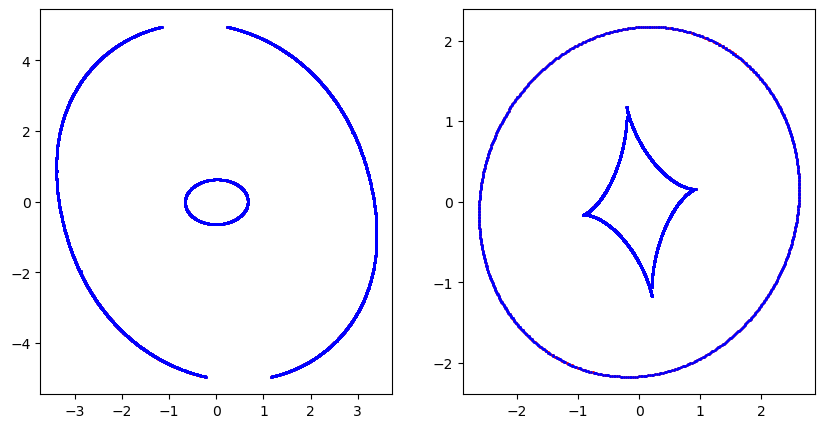

2.0183557923718225

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(xi1, yi1, s=1, c='r')
ax[0].scatter(xi2, yi2, s=1, c='b')

ax[1].scatter(xs1, ys1, s=1, c='r')
ax[1].scatter(xs2, ys2, s=1, c='b')

plt.show()

glafic.calcein_i(0.7)

In [19]:
cosmo.kpc_proper_per_arcmin(1.5)/60

<Quantity 8.46262791 kpc / arcmin>

In [14]:
z_bins = np.linspace(0.3,2.5,20)
r_bins = np.zeros(len(z_bins))
for i in range(len(z_bins)):
    z = z_bins[i]
    glafic.writecrit(z)
    read_caustic = np.genfromtxt('./out_crit.dat')
    xs1 = read_caustic[:,2]
    ys1 = read_caustic[:,3]
    r_bins[i] = np.max(np.sqrt(xs1**2 + ys1**2))


   initializing the adaptive mesh...
   N_box ( lev =  1  pix_size =  0.10000 ) = 1437601
   N_box ( lev =  2  pix_size =  0.05000 ) = 188
   N_box ( lev =  3  pix_size =  0.02500 ) = 452
   N_box ( lev =  4  pix_size =  0.01250 ) = 884
   N_box ( lev =  5  pix_size =  0.00625 ) = 1972

######## writing critical curve
 zs = 3.000000e-01 
 output file name = out_crit.dat 

   initializing the adaptive mesh...
   N_box ( lev =  1  pix_size =  0.10000 ) = 1437601
   N_box ( lev =  2  pix_size =  0.05000 ) = 300
   N_box ( lev =  3  pix_size =  0.02500 ) = 584
   N_box ( lev =  4  pix_size =  0.01250 ) = 1236
   N_box ( lev =  5  pix_size =  0.00625 ) = 3060

######## writing critical curve
 zs = 4.157895e-01 
 output file name = out_crit.dat 

   initializing the adaptive mesh...
   N_box ( lev =  1  pix_size =  0.10000 ) = 1437601
   N_box ( lev =  2  pix_size =  0.05000 ) = 348
   N_box ( lev =  3  pix_size =  0.02500 ) = 748
   N_box ( lev =  4  pix_size =  0.01250 ) = 1668
   N_box ( 

In [15]:
r_bins

array([0.06576455, 0.09572632, 0.11561404, 0.12949635, 0.13965941,
       0.14738484, 0.15344104, 0.15830619, 0.16229652, 0.16563115,
       0.16844756, 0.17085581, 0.17294793, 0.17477775, 0.1763919 ,
       0.17782655, 0.17911032, 0.18026623, 0.18131235, 0.18226343])

## Draw Samples from our own foreground galaxy

In [4]:
import h5py
# f = h5py.File('./foreground_sample.h5', 'r')
# f.keys()

In [191]:
c = 10**f['c'][()]
gamma = f['gamma_DM'][()]
logMh = f['logMh'][()]
z = f['z'][()]
e = 1-f['q'][()]
re_kpc = 10**f['logRe'][()]
re_arcsec = re_kpc * cosmo.arcsec_per_kpc_proper(z).value
logMstar = f['logMstar'][()]

In [257]:
ind = 619
glafic.startup_setnum(2, 0, 0)
glafic.set_lens(1,'gnfw', z[ind]+0.3,10**logMh[ind],0,0,e[ind],0,c[ind]/(2-gamma[ind]),gamma[ind])
glafic.set_lens(2, 'sers', z[ind]+0.3, 10**logMstar[ind], 0,0,e[ind],0,re_arcsec[ind],4)
glafic.setopt_lens(1, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.setopt_lens(2, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.set_secondary('nfw_users 0',verb = 0)

glafic.model_init(verb = 0)

In [258]:
glafic.writecrit(2.5)

   initializing the adaptive mesh...
   N_box ( lev =  1  pix_size =  0.10000 ) = 9801
   N_box ( lev =  2  pix_size =  0.05000 ) = 228
   N_box ( lev =  3  pix_size =  0.02500 ) = 464
   N_box ( lev =  4  pix_size =  0.01250 ) = 924
   N_box ( lev =  5  pix_size =  0.00625 ) = 1936

######## writing critical curve
 zs = 2.500000e+00 
 output file name = out_crit.dat 



In [259]:
read_caustic = np.genfromtxt('./out_crit.dat')
xi1 = read_caustic[:,0]
yi1 = read_caustic[:,1]
xs1 = read_caustic[:,2]
ys1 = read_caustic[:,3]
xi2 = read_caustic[:,4]
yi2 = read_caustic[:,5]
xs2 = read_caustic[:,6]
ys2 = read_caustic[:,7]

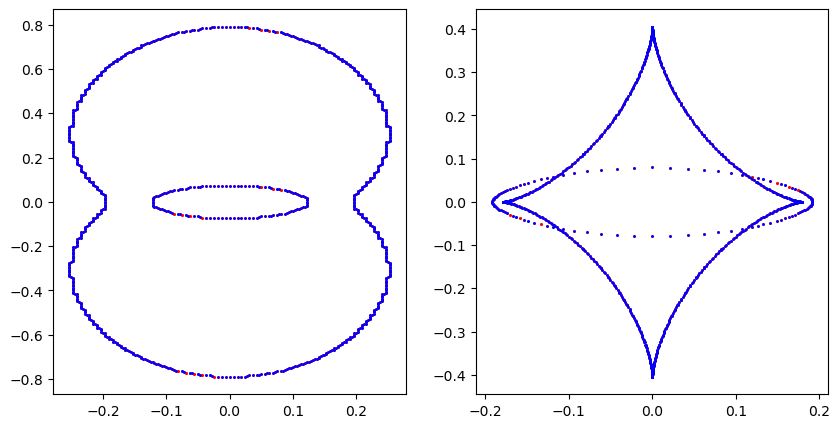

0.11929578817874413

In [260]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(xi1, yi1, s=1, c='r')
ax[0].scatter(xi2, yi2, s=1, c='b')

ax[1].scatter(xs1, ys1, s=1, c='r')
ax[1].scatter(xs2, ys2, s=1, c='b')

plt.show()

glafic.calcein_i(2.5)

## Check Ale's sample

In [5]:
sample_ale = h5py.File('../data/fiducial_1000sqdeg_galaxies.hdf5', 'r')

In [6]:
z = sample_ale['z'][()]
lmstar = sample_ale['lmstar'][()]
lreff = sample_ale['lreff'][()]
lreff = 10**lreff*cosmo.arcsec_per_kpc_proper(z).value
lm200 = sample_ale['lm200'][()]
gammadm = sample_ale['gammadm'][()]
q = sample_ale['q'][()]
rs = sample_ale['rs'][()]
r200 = sample_ale['r200'][()]
c = r200/rs
rs = rs*cosmo.arcsec_per_kpc_proper(z).value
tcaust = sample_ale['tcaust'][()]
tein = sample_ale['tein'][()]

In [265]:
ind = 619
glafic.startup_setnum(2, 0, 0)
glafic.set_lens(1,'gnfw', z[ind],10**lm200[ind]*0.7,0,0,1-q[ind],0,c[ind]/(2-gamma[ind]),gammadm[ind])
glafic.set_lens(2, 'sers', z[ind], 10**lmstar[ind]*0.7, 0,0,1-q[ind],0,lreff[ind],4)
glafic.setopt_lens(1, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.setopt_lens(2, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.set_secondary('nfw_users 0',verb = 0)
glafic.set_secondary('flag_hodensity 2',verb = 0)
glafic.set_secondary('hodensity 200')

glafic.model_init(verb = 0)

hodensity       =  2.000000e+02


In [266]:
lmstar[ind]

11.520416542265728

In [272]:
glafic.writecrit(2.5)
rein = glafic.calcein2(2.5,0,0,0)

######## writing critical curve
 zs = 2.500000e+00 
 output file name = out_crit.dat 



In [273]:
rein

0.998072834130126

In [268]:
read_caustic = np.genfromtxt('./out_crit.dat')
xi1 = read_caustic[:,0]
yi1 = read_caustic[:,1]
xs1 = read_caustic[:,2]
ys1 = read_caustic[:,3]
xi2 = read_caustic[:,4]
yi2 = read_caustic[:,5]
xs2 = read_caustic[:,6]
ys2 = read_caustic[:,7]

Text(0.5, 1.0, 'caustic')

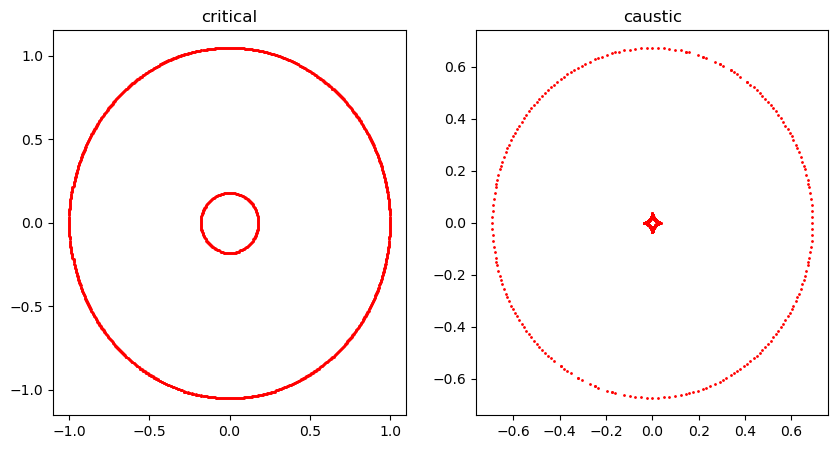

In [269]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(xi1, yi1, s=1, c='r')
ax[0].set_title('critical')

ax[1].scatter(xs1, ys1, s=1, c='r')
ax[1].set_title('caustic')

In [270]:
np.max(xs1)

0.6908968

In [271]:
print(tcaust[ind],tein[ind])

0.7480643864709576 1.1420376157644663


# Check get image

## Point source

In [3]:
glafic.startup_setnum(2, 0, 1)
glafic.set_secondary('flag_extnorm 1')


glafic.set_lens(1,'gnfw', 0.1,1e14,0,0,0.3,10,10**0.85,1.5)
glafic.set_lens(2, 'sers', 0.1, 5e11, 0,0,0.3,10,5,4)
glafic.set_point(1, 2.5, 0.1, 0.5)

glafic.setopt_lens(1, 0, 1, 0, 0, 1, 1, 1, 1)
glafic.setopt_lens(2, 0, 1, 0, 0, 1, 1, 1, 1)

#* set psf
glafic.set_psf(0.7,0,0,5,0,0,0,0,1)

glafic.model_init(verb = 0)

flag_extnorm    =  1


In [4]:
10**0.85

7.079457843841379

In [15]:
a = glafic.calcein2(0.7,0,0,0)
a

3.472521039563

In [16]:
glafic.calcein_i(0.7)

2.0183557923718207

In [25]:
glafic.writeimage()

: 

In [13]:
glafic.findimg(0.5)

n_img = 5
x =    0.2505   y =   -3.6521   mag =   -2.5008 [  -0.995]   td[day] =    76.720
x =   -4.6158   y =    1.7250   mag =    8.1706 [  -2.281]   td[day] =    21.759
x =    4.5856   y =    2.7273   mag =    5.0536 [  -1.759]   td[day] =     0.000
x =   -1.8639   y =    4.3757   mag =   -7.5548 [  -2.196]   td[day] =    26.828
x =   -0.0010   y =   -0.0100   mag =    0.0005 [   8.251]   td[day] =   133.699


######## finding images for point 1
 zs = 2.500000e+00  xs = 1.000000e-01  ys = 5.000000e-01
 output file name = out_point.dat 




In [22]:
from astropy.io import fits
a = fits.open('../test_image.fits')
b = fits.open('../test_-23_image.fits')

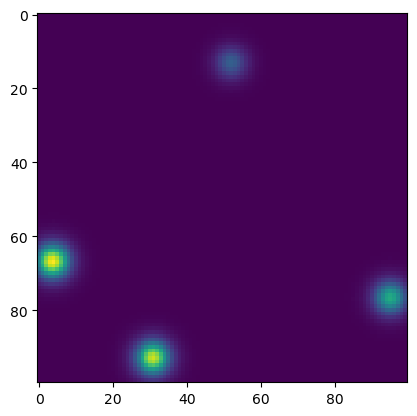

In [23]:
plt.imshow(a[0].data)

In [24]:
print(np.max(a[0].data))
print(np.max(b[0].data))

12.534196
1.2534196e-24
